In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
np.__version__

'1.26.2'

# Load data 

In [3]:
from sklearn.datasets import load_digits

digits = load_digits()

In [4]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

Inspect some raw data: 

In [5]:
picked_datapoint = 0

In [6]:
digits.images[picked_datapoint]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

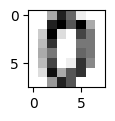

In [7]:
f, ax = plt.subplots(figsize=(1,1))
ax.imshow(digits.images[picked_datapoint], cmap='gray_r')

In [8]:
digits.data[picked_datapoint]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [9]:
digits.data[picked_datapoint].shape

(64,)

We have data as 2D arrays and unraveled data as 1D array

We can write a helper function to reshape the data: 

In [10]:
np.reshape(digits.data[picked_datapoint], (8,8))

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [11]:
long_to_img = lambda x: np.reshape(x, (8,8))

Let's store the data in a dataframe, where we'll also store the dim.red. results

In [12]:
all_data = pd.DataFrame()

all_data['target'] = digits.target
all_data['raw_input'] = digits.data.tolist()

In [13]:
all_data.head()

,target,raw_input
0,0,"[0.0, 0.0, 5.0, 13.0, 9.0, 1.0, 0.0, 0.0, 0.0,..."
1,1,"[0.0, 0.0, 0.0, 12.0, 13.0, 5.0, 0.0, 0.0, 0.0..."
2,2,"[0.0, 0.0, 0.0, 4.0, 15.0, 12.0, 0.0, 0.0, 0.0..."
3,3,"[0.0, 0.0, 7.0, 15.0, 13.0, 1.0, 0.0, 0.0, 0.0..."
4,4,"[0.0, 0.0, 0.0, 1.0, 11.0, 0.0, 0.0, 0.0, 0.0,..."


Some helper functions: 

To switch between a dataframe and numpy array: 

In [14]:
pdseries_to_np = lambda x: np.array(x.tolist())

In [15]:
pdseries_to_np(all_data['raw_input'].head())

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
        14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
         1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
         0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  

In [16]:
%%time

a = pdseries_to_np(all_data['raw_input'])

Wall time: 8 ms


To add outputs of dim.red. to the dataframe: 

In [17]:
def add_dimred_outputs_to_df(df, new_coords, label): 
    # could be done more efficiently :) 
    # this will overwrite the df! 
    df[label] = new_coords.tolist()
    df[label+'_x'] = df[label].apply(lambda x: x[0])
    df[label+'_y'] = df[label].apply(lambda x: x[1])
    return _

# UMAP

In [18]:
import umap

Let's reduce the 64-dimensional data: 

In [37]:
%%time 

reducer = umap.UMAP(random_state=13)
reducer.fit(pdseries_to_np(all_data['raw_input']))

C:\APPS\Anaconda3\envs\hslu39_dimred\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Wall time: 6.79 s


UMAP(random_state=13, tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True})

To get a transformed values for x,y

In [38]:
umap_xy = reducer.transform(pdseries_to_np(all_data['raw_input']))

In [39]:
umap_xy[picked_datapoint]

array([16.745068,  9.223942], dtype=float32)

These are numpy arrays. We could use them for dataviz as they are, but here let's add it to our df first and use the df for viz: 

In [40]:
add_dimred_outputs_to_df(all_data, umap_xy, 'umap');

In [41]:
all_data.head()

,target,raw_input,umap,umap_x,umap_y
0,0,"[0.0, 0.0, 5.0, 13.0, 9.0, 1.0, 0.0, 0.0, 0.0,...","[16.745067596435547, 9.223941802978516]",16.745068,9.223942
1,1,"[0.0, 0.0, 0.0, 12.0, 13.0, 5.0, 0.0, 0.0, 0.0...","[-2.812314033508301, 12.5407133102417]",-2.812314,12.540713
2,2,"[0.0, 0.0, 0.0, 4.0, 15.0, 12.0, 0.0, 0.0, 0.0...","[-1.0866447687149048, 11.026639938354492]",-1.086645,11.026640
3,3,"[0.0, 0.0, 7.0, 15.0, 13.0, 1.0, 0.0, 0.0, 0.0...","[-4.3589186668396, 5.29224967956543]",-4.358919,5.292250
4,4,"[0.0, 0.0, 0.0, 1.0, 11.0, 0.0, 0.0, 0.0, 0.0,...","[5.447296142578125, 18.7540225982666]",5.447296,18.754023


Let's plot. First we declare a colormap (rainbow-y)

In [42]:
data_cmap = plt.cm.get_cmap('turbo', all_data['target'].nunique())

C:\Users\tkubacka\AppData\Local\Temp\ipykernel_35552\414527525.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  data_cmap = plt.cm.get_cmap('turbo', all_data['target'].nunique())


In [43]:
data_cmap(4)

(0.44321, 0.99551, 0.37345, 1.0)

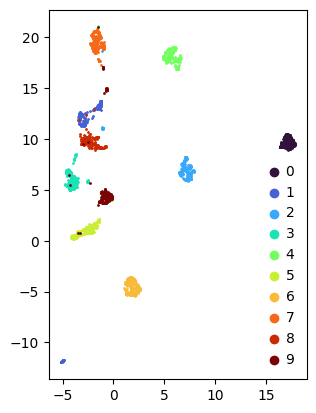

In [44]:
f, ax = plt.subplots()

# overplot the data for each cluster separately: 
for label in all_data['target'].unique():
    tmp_data = all_data.query('target == @label')
    ax.scatter(x=tmp_data['umap_x'], y=tmp_data['umap_y'], 
               color=data_cmap(label), label=label, s=1)

ax.legend(markerscale=6, handlelength=0, frameon=False)

ax.set_aspect('equal')

Note: here we use color to encode categories. But we only have 10 of them - if we have more categories, color may be less functional. What could be an alternative? 

We want to use this chart for other methods, so let's put it in a function: 

In [45]:
def base_2d_plot(data, xcol, ycol, ax, data_cmap, 
                 is_equalaspect=True, 
                 scatter_kws={}):
    
    # default size
    if 's' not in scatter_kws.keys():
        scatter_kws['s']=1
    
    for label in np.sort(data['target'].unique()):
        tmp_data = data.query('target == @label')
        ax.scatter(x=tmp_data[xcol], y=tmp_data[ycol], 
                   color=data_cmap(label), label=label, 
                   **scatter_kws)
    
    
    ax.set_xlabel(xcol)
    ax.set_ylabel(ycol)
    
    if is_equalaspect:
        ax.set_aspect('equal')
    
    # moved the legend to the top 
    ax.legend(markerscale=6, ncol=5, loc='lower center', 
              bbox_to_anchor=(0.5,1), handlelength=0, frameon=False)

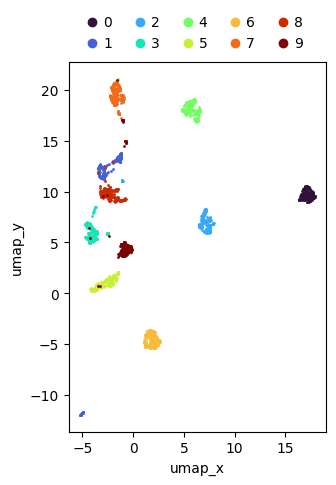

In [46]:
f, ax = plt.subplots()

base_2d_plot(data=all_data, xcol='umap_x', ycol='umap_y', ax=ax, data_cmap=data_cmap)

How could we draw the images instead of points? 

In [47]:
# pick an example datapoint
tmp_data = all_data.iloc[picked_datapoint]
print(tmp_data)

target                                                       0
raw_input    [0.0, 0.0, 5.0, 13.0, 9.0, 1.0, 0.0, 0.0, 0.0,...
umap                   [16.745067596435547, 9.223941802978516]
umap_x                                               16.745068
umap_y                                                9.223942
Name: 0, dtype: object


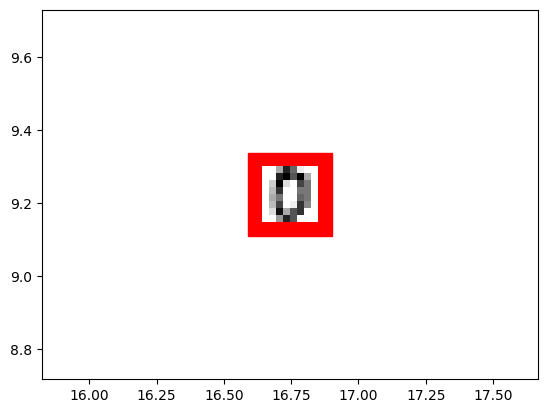

In [48]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

fig, ax = plt.subplots()

# we have to place an invisible point so that the MPL autoscaling on x,y works 
ax.plot(tmp_data['umap_x'], tmp_data['umap_y'], lw=1)

# # reshape the input back into 2D 
arr = long_to_img(tmp_data['raw_input'])

# # create OffsetImage entity 
im = OffsetImage(arr, # underlying numpy array  
                 zoom=5, # rescale 
                 cmap='gray_r', ) # styling passed to imshow 

# # place the image in the AnnotationBbox on the axes 
ab = AnnotationBbox(im, # image 
                    tmp_data['umap'], xycoords='data',  # coords 
                    pad=1, bboxprops={'color':'red'}) # styling 
ax.add_artist(ab) # don't forget to add the artist, similar to how we were adding rectangles 

In a proper project, we would then want to write a wrapper function like this: 

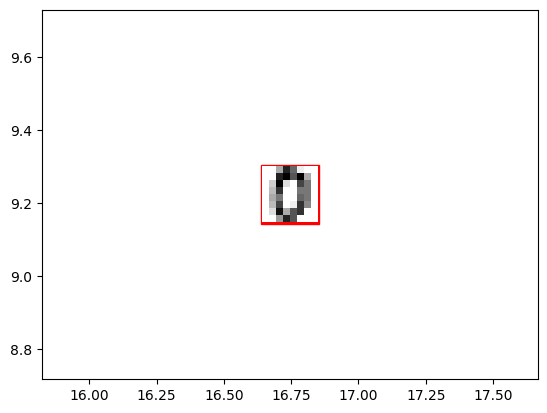

In [49]:
def add_image_at_xy(ax, xy, arr, zoom, cmap, 
                    offsetimage_kws = None, 
                    annotationbbox_kws = None):
    
    if offsetimage_kws is None: 
        offsetimage_kws = {}
    if annotationbbox_kws is None: 
        annotationbbox_kws = {}
        
    im = OffsetImage(arr, zoom=zoom, cmap=cmap, 
                                   **offsetimage_kws)
    ab = AnnotationBbox(im, xy, xycoords='data', **annotationbbox_kws)
    ax.add_artist(ab)
    return ab



fig, ax = plt.subplots()

tmp_data = all_data.iloc[picked_datapoint]
ax.plot(tmp_data['umap_x'], tmp_data['umap_y'], lw=0)
_ = add_image_at_xy(ax = ax, 
                    xy = tmp_data['umap'], 
                    arr = long_to_img(tmp_data['raw_input']), 
                   zoom=5, cmap='gray_r', 
                   annotationbbox_kws={'pad':0.1, 'bboxprops':{'color':'red'}  })


However here we just go on with explicit plotting.

Let's redraw the data. What if I want to inspect the areas where I see overlapping clusters? 

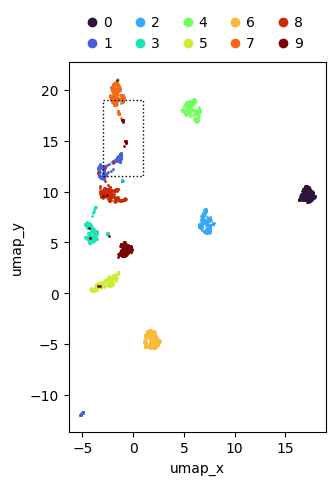

In [54]:
from matplotlib.patches import Rectangle

xzoom = [-3, 1]
yzoom = [11.5, 19]

f, ax = plt.subplots()

zoom_linestyle = dict(linewidth=1, edgecolor='k', linestyle=":")

base_2d_plot(data=all_data, xcol='umap_x', ycol='umap_y', ax=ax, data_cmap=data_cmap)

zoom_rect = Rectangle(xy=(xzoom[0],yzoom[0]), width=np.diff(xzoom)[0], height=np.diff(yzoom)[0], 
               facecolor='none', zorder=99, 
               **zoom_linestyle)
ax.add_patch(zoom_rect)


We can prototype it like this: 

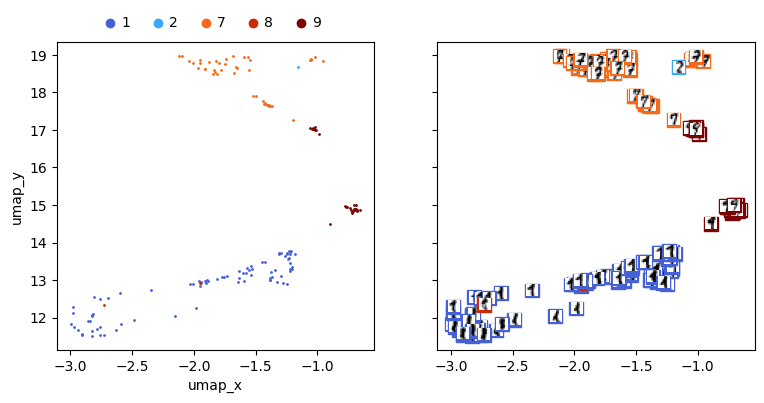

In [55]:
xzoom = [-3, 1]
yzoom = [11.5, 19]


# here filter the data 
zoomed_data = all_data[(all_data['umap_x']>=xzoom[0]) & (all_data['umap_x']<=xzoom[1]) \
    & (all_data['umap_y']>=yzoom[0]) & (all_data['umap_y']<=yzoom[1]) ]

f, ax = plt.subplots(nrows=1, ncols=2, figsize=(9,4), 
                     sharex=True, sharey=True # the same xy limits on both subplots 
                    )

# assign the subplots 
ax_points = ax[0]
ax_images = ax[1]

base_2d_plot(data=zoomed_data, # feed only the subset of data 
             xcol='umap_x', ycol='umap_y', ax=ax_points, data_cmap=data_cmap, 
            is_equalaspect=False) # stretch the chart 

# # for clarity, we will loop over the index, but .itertuples() or .apply() would be faster 
for i in zoomed_data.index: 
    tmp_data = all_data.loc[i]
    arr = long_to_img(tmp_data['raw_input'])
    im = OffsetImage(arr, zoom=1, cmap='gray_r', )
    ab = AnnotationBbox(im, tmp_data['umap'], xycoords='data', pad=0.1, 
                        bboxprops={'color':data_cmap(tmp_data['target'])})
    ax_images.add_artist(ab)
    

Let's put it all together: 

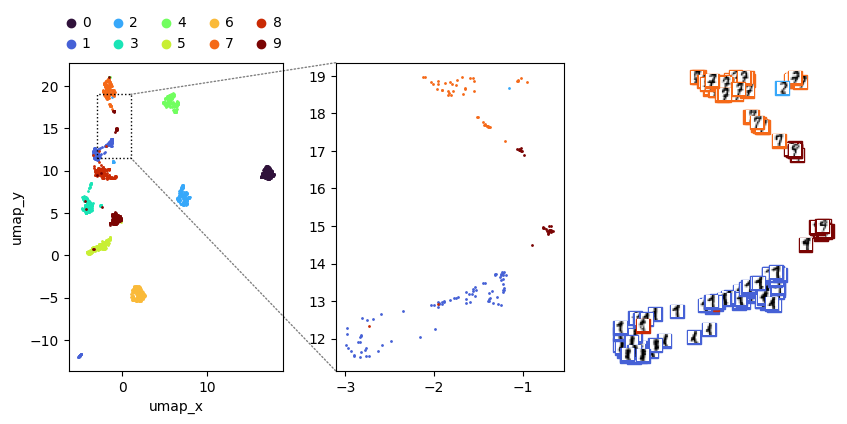

In [57]:
xzoom = [-3, 1]
yzoom = [11.5, 19]

zoomed_data = all_data[(all_data['umap_x']>=xzoom[0]) & (all_data['umap_x']<=xzoom[1]) \
    & (all_data['umap_y']>=yzoom[0]) & (all_data['umap_y']<=yzoom[1]) ]

f, ax = plt.subplots(nrows=1, ncols=3, figsize=(10,4), 
                     sharex=False, sharey=False)

ax_umap = ax[0]
ax_points = ax[1]
ax_images = ax[2]

zoom_linestyle = dict(linewidth=1, edgecolor='k', linestyle=":")

### UMAP GLOBAL VIEW 
base_2d_plot(data=all_data, xcol='umap_x', ycol='umap_y', ax=ax_umap, data_cmap=data_cmap)
zoom_rect = Rectangle(xy=(xzoom[0],yzoom[0]), width=np.diff(xzoom)[0], height=np.diff(yzoom)[0], 
               facecolor='none', zorder=99, 
               **zoom_linestyle)
ax_umap.add_patch(zoom_rect)

### UMAP INTERESTING REGION 
base_2d_plot(data=zoomed_data, # feed only the subset of data 
             xcol='umap_x', ycol='umap_y', ax=ax_points, data_cmap=data_cmap, 
            is_equalaspect=False) # stretch the chart 
ax_points.legend().set_visible(False)
ax_points.set_xlabel('')
ax_points.set_ylabel('')

### RAW DATA VS EMBEDDINGS 
for i in zoomed_data.index: 
    tmp_data = all_data.loc[i]
    arr = long_to_img(tmp_data['raw_input'])
    im = OffsetImage(arr, zoom=1, cmap='gray_r', )
    ab = AnnotationBbox(im, tmp_data['umap'], xycoords='data', pad=0.1, bboxprops={'color':data_cmap(tmp_data['target'])})
    ax_images.add_artist(ab)
ax_images.set_xlim(ax_points.get_xlim());
ax_images.set_ylim(ax_points.get_ylim());
ax_images.axis('off')

### LINES JOINING THE SUBPLOTS 
r, l = ax_umap.indicate_inset([xzoom[1], yzoom[0], 0, yzoom[1]-yzoom[0]], 
                              inset_ax=ax_points)
r.set_visible(False)
[line.set(**zoom_linestyle) for line in l];

We can also wrap it in a general purpose function: 

In [58]:
def dimred_overview_with_zoom(data, xcol, ycol, 
                             xzoom, yzoom 
                             ):

    # this is only a prototype of such a function
    # we are making a lot of assumptions about how our dataframe and our input is structured! 
    # you want to make these assumptions explicit in the docstring and do some input checking 
    # at this point you may want to re-check if the df structure is optimal for the job  
    # the function still depends on some external parameters like data_cmap - you want to change this in the next steps 

    # xzoom = [-4, -1]
    # yzoom = [11.5, 18]
    
    zoomed_data = data[(data[xcol]>=xzoom[0]) & (data[xcol]<=xzoom[1]) \
        & (data[ycol]>=yzoom[0]) & (data[ycol]<=yzoom[1]) ]

    f, ax = plt.subplots(nrows=1, ncols=3, figsize=(10,4), 
                         sharex=False, sharey=False)

    ax_umap = ax[0]
    ax_points = ax[1]
    ax_images = ax[2]

    zoom_linestyle = dict(linewidth=1, edgecolor='k', linestyle=":")

    ### UMAP GLOBAL VIEW 
    base_2d_plot(data=data, xcol=xcol, ycol=ycol, ax=ax_umap, data_cmap=data_cmap)
    zoom_rect = Rectangle(xy=(xzoom[0],yzoom[0]), 
                          width=np.diff(xzoom)[0], height=np.diff(yzoom)[0], 
                   facecolor='none', zorder=99, 
                   **zoom_linestyle)
    ax_umap.add_patch(zoom_rect)

    ### UMAP INTERESTING REGION 
    base_2d_plot(data=zoomed_data, # feed only the subset of data 
                 xcol=xcol, ycol=ycol, ax=ax_points, data_cmap=data_cmap, 
                is_equalaspect=False) # stretch the chart 
    ax_points.legend().set_visible(False)
    ax_points.set_xlabel('')
    ax_points.set_ylabel('')

    ### RAW DATA VS EMBEDDINGS 
    for i in zoomed_data.index: 
        tmp_data = data.loc[i]
        arr = long_to_img(tmp_data['raw_input'])
        im = OffsetImage(arr, zoom=1, cmap='gray_r', )
        ab = AnnotationBbox(im, (tmp_data[xcol], tmp_data[ycol]), xycoords='data', # here we changed the xy to only use passed args 
                            pad=0.1, bboxprops={'color':data_cmap(tmp_data['target'])})
        ax_images.add_artist(ab)
    ax_images.set_xlim(ax_points.get_xlim());
    ax_images.set_ylim(ax_points.get_ylim());
    ax_images.axis('off')

    ### LINES JOINING THE SUBPLOTS 
    r, l = ax_umap.indicate_inset([xzoom[1], yzoom[0], 0, yzoom[1]-yzoom[0]], 
                                  inset_ax=ax_points)
    r.set_visible(False)
    [line.set(**zoom_linestyle) for line in l];
    
    # we created new f,ax, so we want to return them 
    return f, ax 

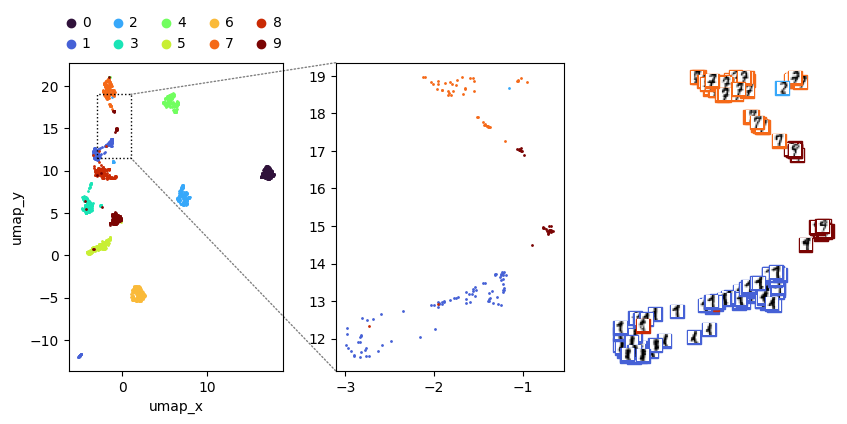

In [60]:
f, ax = dimred_overview_with_zoom(data=all_data, xcol='umap_x', ycol='umap_y', 
                                  xzoom=[-3, 1], yzoom=[11.5, 19])

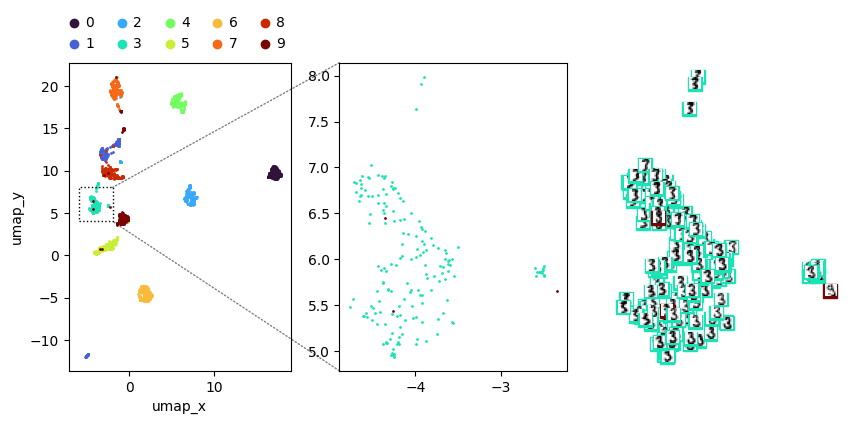

In [62]:
f, ax = dimred_overview_with_zoom(data=all_data, xcol='umap_x', ycol='umap_y', 
                                  xzoom=[-6, -2], yzoom=[4, 8])

Parameters to play with: 
```
n_neighbors: default 15

min_dist: default 0.1
```

https://umap-learn.readthedocs.io/en/latest/parameters.html

Create some helper functions so that the code doesn't distract us from the experimentation:

In [63]:
def create_input_df(raw_data, targets, umap_kws={}):
    out = pd.DataFrame()
    out['target'] = targets.tolist()
    out['raw_input'] = raw_data.tolist()
    reducer = umap.UMAP(**umap_kws)
    reducer.fit(pdseries_to_np(out['raw_input']))
    umap_xy = reducer.transform(pdseries_to_np(out['raw_input']))
    add_dimred_outputs_to_df(out, umap_xy, 'umap')
    return out 
                                

With the helper functions for creating UMAP embeddings and for inspecting them, the experimentation becomes easy:

In [64]:
%%time 

umap_kws = {'random_state': 19, 'n_neighbors': 50, 'min_dist': 0.5}

tmp = create_input_df(raw_data=digits.data, targets=digits.target, 
                      umap_kws=umap_kws
                     )

C:\APPS\Anaconda3\envs\hslu39_dimred\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Wall time: 7.67 s


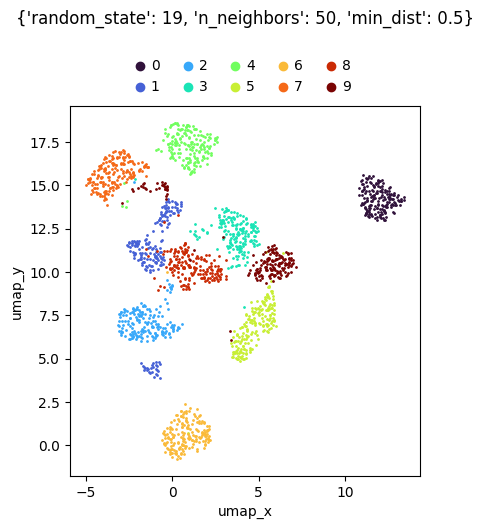

In [65]:
f, ax = plt.subplots()
base_2d_plot(data=tmp, xcol='umap_x', ycol='umap_y', ax=ax, data_cmap=data_cmap)
ax.set_title(str(umap_kws), y=1.2);

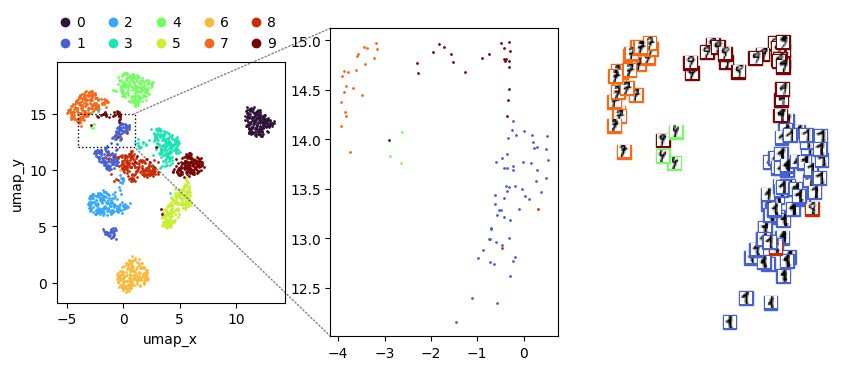

In [67]:
f, ax = dimred_overview_with_zoom(data=tmp, xcol='umap_x', ycol='umap_y', 
                                  xzoom=[-4, 1], yzoom=[12, 15])

___

# T-SNE

https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

In [68]:
from sklearn.manifold import TSNE 

In [69]:
tsne_transformer = TSNE(
        n_components=2,
        perplexity=50,
        init="random",
        learning_rate="auto",
        n_iter=500,
        n_iter_without_progress=150,
        n_jobs=2,
        random_state=0,
    )

In [70]:
%%time
tsne_xy = tsne_transformer.fit_transform(X=pdseries_to_np(all_data['raw_input']), 
                                             y=pdseries_to_np(all_data['target']))

Wall time: 4.12 s


In [71]:
add_dimred_outputs_to_df(all_data, tsne_xy, 'tsne');

In [72]:
all_data.head()

,target,raw_input,umap,umap_x,umap_y,tsne,tsne_x,tsne_y
0,0,"[0.0, 0.0, 5.0, 13.0, 9.0, 1.0, 0.0, 0.0, 0.0,...","[16.745067596435547, 9.223941802978516]",16.745068,9.223942,"[5.141471862792969, -27.195175170898438]",5.141472,-27.195175
1,1,"[0.0, 0.0, 0.0, 12.0, 13.0, 5.0, 0.0, 0.0, 0.0...","[-2.812314033508301, 12.5407133102417]",-2.812314,12.540713,"[1.7861378192901611, 10.239819526672363]",1.786138,10.239820
2,2,"[0.0, 0.0, 0.0, 4.0, 15.0, 12.0, 0.0, 0.0, 0.0...","[-1.0866447687149048, 11.026639938354492]",-1.086645,11.026640,"[-12.66398811340332, 8.348347663879395]",-12.663988,8.348348
3,3,"[0.0, 0.0, 7.0, 15.0, 13.0, 1.0, 0.0, 0.0, 0.0...","[-4.3589186668396, 5.29224967956543]",-4.358919,5.292250,"[-18.304426193237305, -9.69357681274414]",-18.304426,-9.693577
4,4,"[0.0, 0.0, 0.0, 1.0, 11.0, 0.0, 0.0, 0.0, 0.0,...","[5.447296142578125, 18.7540225982666]",5.447296,18.754023,"[21.818023681640625, 8.927699089050293]",21.818024,8.927699


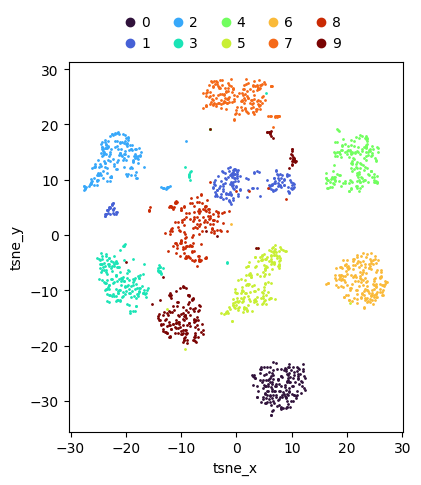

In [73]:
f, ax = plt.subplots()
base_2d_plot(data=all_data, xcol='tsne_x', ycol='tsne_y', ax=ax, data_cmap=data_cmap)

Previously we aimed to build a dashboard. For the sake of variety, let's do something different now - let's make the chart a bit more "artistic", instead of using it to draw insights: 

C:\Users\tkubacka\AppData\Local\Temp\ipykernel_35552\60827963.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  data_cmap=plt.cm.get_cmap('Set3', all_data['target'].nunique()),


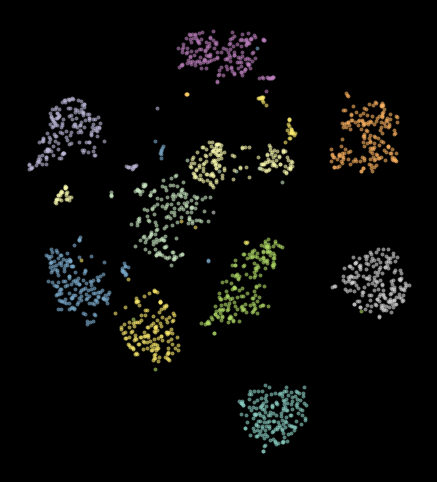

In [74]:
f, ax = plt.subplots(figsize=(6,6))
base_2d_plot(data=all_data, xcol='tsne_x', ycol='tsne_y', 
             ax=ax, 
             data_cmap=plt.cm.get_cmap('Set3', all_data['target'].nunique()), 
             scatter_kws={'alpha':0.6, 's':8, 'linewidths':0})
ax.axis('off')  
f.patch.set_facecolor('k') 
ax.legend().set_visible(False)


___

# PCA

In [75]:
from sklearn.decomposition import PCA

In [76]:
X = pdseries_to_np(all_data['raw_input'])

In [77]:
%%time 

pca = PCA(n_components=2, )
pca.fit(X)

Wall time: 15 ms


PCA(n_components=2)

In [78]:
pca_xy = pca.transform(X)

In [79]:
add_dimred_outputs_to_df(all_data, pca_xy, 'pca');

In [80]:
all_data.head()

,target,raw_input,umap,umap_x,umap_y,tsne,tsne_x,tsne_y,pca,pca_x,pca_y
0,0,"[0.0, 0.0, 5.0, 13.0, 9.0, 1.0, 0.0, 0.0, 0.0,...","[16.745067596435547, 9.223941802978516]",16.745068,9.223942,"[5.141471862792969, -27.195175170898438]",5.141472,-27.195175,"[-1.2594664148344934, 21.274883868126462]",-1.259466,21.274884
1,1,"[0.0, 0.0, 0.0, 12.0, 13.0, 5.0, 0.0, 0.0, 0.0...","[-2.812314033508301, 12.5407133102417]",-2.812314,12.540713,"[1.7861378192901611, 10.239819526672363]",1.786138,10.239820,"[7.957611911185473, -20.76870018294703]",7.957612,-20.768700
2,2,"[0.0, 0.0, 0.0, 4.0, 15.0, 12.0, 0.0, 0.0, 0.0...","[-1.0866447687149048, 11.026639938354492]",-1.086645,11.026640,"[-12.66398811340332, 8.348347663879395]",-12.663988,8.348348,"[6.991922743391115, -9.955986373354738]",6.991923,-9.955986
3,3,"[0.0, 0.0, 7.0, 15.0, 13.0, 1.0, 0.0, 0.0, 0.0...","[-4.3589186668396, 5.29224967956543]",-4.358919,5.292250,"[-18.304426193237305, -9.69357681274414]",-18.304426,-9.693577,"[-15.906105198188973, 3.3324642641168896]",-15.906105,3.332464
4,4,"[0.0, 0.0, 0.0, 1.0, 11.0, 0.0, 0.0, 0.0, 0.0,...","[5.447296142578125, 18.7540225982666]",5.447296,18.754023,"[21.818023681640625, 8.927699089050293]",21.818024,8.927699,"[23.30686776989881, 4.269059866809525]",23.306868,4.269060


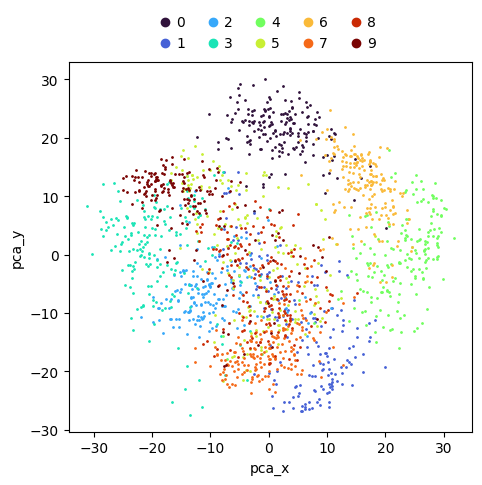

In [81]:
f, ax = plt.subplots()
base_2d_plot(data=all_data, xcol='pca_x', ycol='pca_y', ax=ax, data_cmap=data_cmap)

If it wasn't for the colors, we wouldn't be able to see the clumps very clearly!

PCA allows us to reconstruct the "reduced" images, using the components it found. 

Let's see how our reconstructed images look like. We only use 2 dimensions, and probably more are needed. How far off are the reconstructed images from the input data? 

In [82]:
# all the reconstructed data: 
reconstructed = pca.inverse_transform(pca.transform(X))


In [83]:
reconstructed

array([[-1.83039966e-15,  1.10626604e-01,  4.44191056e+00, ...,
         1.06358808e+01,  2.52788081e+00,  2.36463905e-01],
       [ 1.48991827e-15,  3.75995821e-01,  4.44625608e+00, ...,
         2.38272491e+00,  1.37261189e+00,  4.12321333e-01],
       [ 5.74007612e-16,  2.83433096e-01,  4.13127753e+00, ...,
         4.37965040e+00,  1.61831191e+00,  3.50984218e-01],
       ...,
       [ 1.40322126e-16,  1.87218812e-01,  3.13311106e+00, ...,
         4.56836112e+00,  1.53717916e+00,  2.87234318e-01],
       [-8.86342826e-16,  2.62610958e-01,  5.68352435e+00, ...,
         9.39498298e+00,  2.48790277e+00,  3.37169542e-01],
       [-5.49096766e-16,  2.45467741e-01,  4.96927987e+00, ...,
         7.91962055e+00,  2.20433468e+00,  3.25816295e-01]])

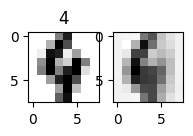

In [84]:
f, ax = plt.subplots(ncols=2, nrows=1, figsize=(2,1))

# let's pick one datapoint 
picked = 124

ax_raw = ax[0]
ax_raw.imshow(long_to_img(all_data['raw_input'].loc[picked]), cmap='gray_r')
ax_raw.set_title(all_data['target'].loc[picked])

ax_pca = ax[1]
ax_pca.imshow(long_to_img(reconstructed[picked]), cmap='gray_r')

So 2 dimensions are not enough - no wonder that the clusters overlap, if the reconstructed images all look like gray blobs 

How do the 2 principal components (our orthogonal eigenvectors) look like? 

In [85]:
pca.explained_variance_

array([179.0069301 , 163.71774688])

In [86]:
pca.components_

array([[-4.41329666e-17, -1.73094648e-02, -2.23428839e-01,
        -1.35913295e-01, -3.30322860e-02, -9.66340943e-02,
        -8.32945227e-03,  2.26899919e-03, -3.20516373e-04,
        -1.19308896e-01, -2.44451679e-01,  1.48512753e-01,
        -4.67319055e-02, -2.17740736e-01, -1.48136896e-02,
         4.47779509e-03, -4.94135412e-05, -7.95419255e-02,
         8.33951228e-02,  2.15915332e-01, -1.72126807e-01,
        -1.63712093e-01,  2.86444498e-02,  4.23251896e-03,
         9.85488964e-05,  6.42319217e-02,  2.54093317e-01,
        -3.56771027e-02, -2.09462602e-01, -4.31311420e-02,
         5.13118878e-02,  2.13422764e-04, -0.00000000e+00,
         1.59950880e-01,  3.68690796e-01,  1.64406860e-01,
         8.52007797e-02,  3.72982669e-02,  2.15867053e-02,
        -0.00000000e+00,  1.28865562e-03,  1.06945267e-01,
         3.03067431e-01,  2.47813033e-01,  2.09637288e-01,
         1.22325073e-02, -3.69458450e-02,  1.61485045e-03,
         6.93023400e-04, -8.35145273e-03, -5.58599309e-0

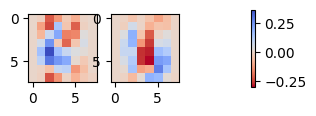

In [87]:
pca_vec = pca.components_

f, ax = plt.subplots(ncols=len(pca_vec)+1, nrows=1, figsize=(len(pca_vec)+1,1))

vmin = pca_vec.ravel().min()
vmax = pca_vec.ravel().max()

plots = []
for vec, this_ax in zip(pca_vec, ax): 
    p = this_ax.imshow(long_to_img(vec), cmap='coolwarm_r', vmin=vmin, vmax=vmax)
    plots.append(p)

ax[2].axis('off')
f.colorbar(mappable=plots[1], ax=ax[2])

In [88]:
pca.explained_variance_ratio_

array([0.14890594, 0.13618771])

Each of the components explains around 13% of variance, together only around a 25%. So we need many more components! 

In [89]:
PCA(n_components = 0.26)

PCA(n_components=0.26)

New model where we let PCA define # of components, in order to explain 95% of variance: 

In [90]:
pca_95v = PCA(n_components = 0.95)
pca_95v.fit(X)
pca_95v_output = pca_95v.transform(X)

In [91]:
pca_95v.explained_variance_ratio_

array([0.14890594, 0.13618771, 0.11794594, 0.08409979, 0.05782415,
       0.0491691 , 0.04315987, 0.03661373, 0.03353248, 0.03078806,
       0.02372341, 0.02272697, 0.01821863, 0.01773855, 0.01467101,
       0.01409716, 0.01318589, 0.01248138, 0.01017718, 0.00905617,
       0.00889538, 0.00797123, 0.00767493, 0.00722904, 0.00695889,
       0.00596081, 0.00575615, 0.00515158, 0.0048954 ])

In [92]:
sum(pca_95v.explained_variance_ratio_)

0.9547965245651595

In [93]:
pca_95v.explained_variance_

array([179.0069301 , 163.71774688, 141.78843909, 101.1003752 ,
        69.51316559,  59.10852489,  51.88453911,  44.01510667,
        40.31099529,  37.0117984 ,  28.51904118,  27.32116981,
        21.90148814,  21.32435654,  17.63672222,  16.94686385,
        15.85138991,  15.00446022,  12.23447318,  10.88685932,
        10.69356625,   9.58259779,   9.2264026 ,   8.69036872,
         8.3656119 ,   7.16577961,   6.91973881,   6.19295508,
         5.88499123])

How to find the optimal number of components? 

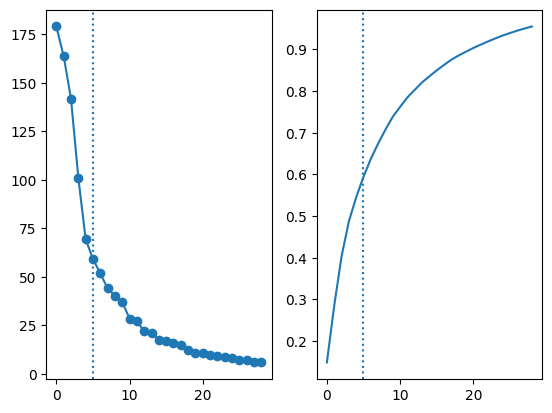

In [94]:
vert_line_x = 5

f, ax = plt.subplots(ncols=2)
ax[0].plot(pca_95v.explained_variance_, marker='o')
ax[1].plot(np.cumsum(pca_95v.explained_variance_ratio_))

[this_ax.axvline(x=vert_line_x, linestyle=':') for this_ax in ax];

Keep in mind that PCA is only a statistical method: in reality PCA doesn't separate signal vs noise as clearly as people want to believe. 

Let's plot all the eigenvectors: 

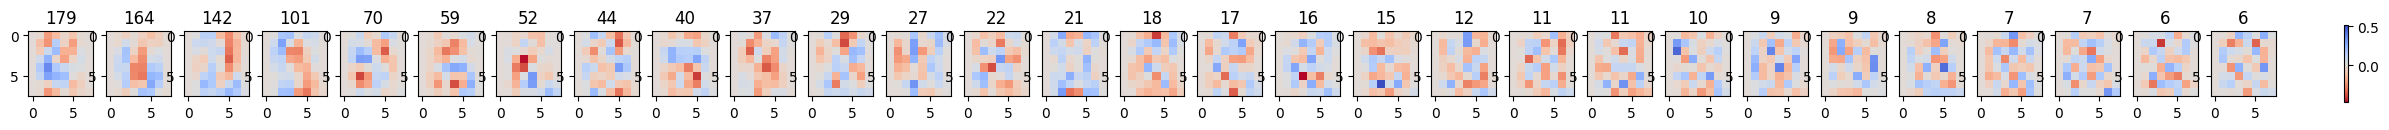

In [95]:
pca_vec = pca_95v.components_
pca_val = pca_95v.explained_variance_
n_components = len(pca_vec)

f, ax = plt.subplots(ncols=n_components+1, nrows=1, figsize=(n_components+1,1))

vmin = pca_vec.ravel().min()
vmax = pca_vec.ravel().max()

plots = []
for vec, val, this_ax in zip(pca_vec, pca_val, ax): 
    p = this_ax.imshow(long_to_img(vec), cmap='coolwarm_r', vmin=vmin, vmax=vmax)
    this_ax.set_title("{:0.0f}".format(val))
    plots.append(p)

ax[-1].axis('off')
f.colorbar(mappable=plots[1], ax=ax[-1])

The later eigenvectors seem more and more to contain single spikey pixels, and not a lot of shapes 

# Investigate! 

How would these methods perform in the presence of the noise? You can add artifical noise, see here: https://scikit-learn.org/stable/auto_examples/applications/plot_digits_denoising.html 

Change the MNIST to Fashion-MNIST, for example. What do you notice? 

Play with various values of parameters. What do you notice?

See also: 
- https://scikit-learn.org/stable/auto_examples/manifold/plot_t_sne_perplexity.html
- https://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html